# LAB 9. EMPLOYEE HOPPING PREDICTION USING RANDOM FORESTS

## NAME : BALA MURUGAN P

## ROLL NO : 225229150

In [1]:
import pandas as pd

### Step 1. Understand Data

In [2]:
df = pd.read_csv("Employee_hopping.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.value_counts

<bound method DataFrame.value_counts of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education E

### Step 2. Extract X and y

In [9]:
X = df.drop(['Attrition'],axis=1)
y = df.Attrition

In [10]:
y  = y.apply(lambda x:1 if x == 'Yes' else 0)

### Step 3. Feature Engineering

In [11]:
df = pd.get_dummies(df,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


#### Step 4. 

In [12]:
X = df.drop(['Attrition'],axis=1)
X.shape

(1470, 55)

In [13]:
y.shape

(1470,)

### Step 5. Model Development

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier as rr
RFC = rr(n_estimators=100, max_features=0.3)

In [16]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features=0.3)

In [17]:
RFC_y_pred = RFC.predict(X_test)
RFC_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Step 6. Testing

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
RFC_acc = accuracy_score(y_test,RFC_y_pred)
RFC_acc

0.8639455782312925

### Step 7. Features important value

In [20]:
print(classification_report(y_test, RFC_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [21]:
print(RFC.feature_importances_)

[0.05258004 0.04680485 0.03935835 0.01547889 0.         0.03944168
 0.02385042 0.03808186 0.01970086 0.02215033 0.02399422 0.08741075
 0.04408163 0.03632424 0.02706511 0.00311389 0.01728673 0.
 0.02941008 0.04862842 0.02248485 0.02013177 0.03778051 0.02295758
 0.02683615 0.02715781 0.00276017 0.01247927 0.00562772 0.0024315
 0.00702721 0.00741308 0.00226573 0.00524213 0.00487641 0.006844
 0.00376073 0.00533098 0.00460191 0.00524325 0.00296714 0.00227218
 0.00644658 0.00090381 0.00255563 0.00074565 0.00666672 0.00681537
 0.0076575  0.00482615 0.00506942 0.02186593 0.         0.04201591
 0.04117688]


In [22]:
feature_name = pd.DataFrame(RFC.feature_importances_, index=X_train.columns, columns=['Important_Feature'])
feature_name

,Important_Feature
Age,0.052580
DailyRate,0.046805
DistanceFromHome,0.039358
Education,0.015479
EmployeeCount,0.000000
EmployeeNumber,0.039442
EnvironmentSatisfaction,0.023850
HourlyRate,0.038082
JobInvolvement,0.019701
JobLevel,0.022150


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

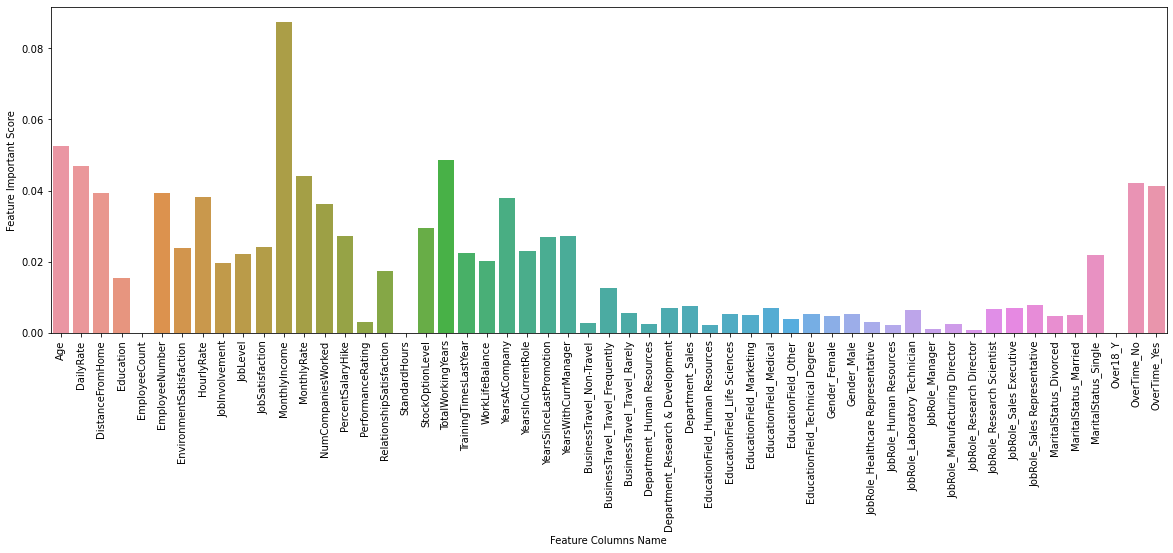

In [30]:
plt.figure(figsize=(20,6))
sns.barplot(x=feature_name.index, y=feature_name['Important_Feature'])
plt.xticks(rotation=90)
plt.xlabel('Feature Columns Name')
plt.ylabel('Feature Important Score')
plt.show()

### Step 8. Visualize your RF Decision Tree using graphviz

In [39]:
from sklearn import tree
from sklearn.tree import export_graphviz

In [41]:
estim = RFC.estimators_[5]
estim

DecisionTreeClassifier(max_features=0.3, random_state=111709811)

In [42]:
with open("tree.dot",'w') as f:
    f = tree.export_graphviz(estim, out_file = f, max_depth = 4, impurity=False,feature_names = X.columns.values,
        class_names=['Yes', 'No'], filled=True)

In [43]:
!type tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="MonthlyIncome <= 2475.0\nsamples = 753\nvalue = [983, 193]\nclass = Yes", fillcolor="#ea9a60"] ;
1 [label="OverTime_No <= 0.5\nsamples = 124\nvalue = [116, 75]\nclass = Yes", fillcolor="#f6d2b9"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DailyRate <= 888.0\nsamples = 39\nvalue = [16, 54]\nclass = No", fillcolor="#74baed"] ;
1 -> 2 ;
3 [label="HourlyRate <= 77.5\nsamples = 21\nvalue = [2, 33]\nclass = No", fillcolor="#45a3e7"] ;
2 -> 3 ;
4 [label="samples = 17\nvalue = [0, 29]\nclass = No", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="BusinessTravel_Travel_Frequently <= 0.5\nsamples = 4\nvalue = [2, 4]\nclass = No", fillcolor="#9ccef2"] ;
3 -> 5 ;
6 [label="(...)", fillcolor="#C0C0C0"] ;
5 -> 6 ;
7 [label="(...)", fillcolor="#C0C0C0"] ;
5 -> 7 ;
8 [label="WorkLifeBalance <= 2.5\nsamples = 18\nvalue = [14, 21]\nclass = No", fillcolor="#bddef6"] ;
2 -> 8 ;
9 [label="TotalWorkingYears <=

### Step 9. RF witha a range of trees

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
rf2 = rr(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(X_train, y_train)
    oob_error = 1 - rf2.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
    rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.163265
20.0,0.159014
30.0,0.148810
40.0,0.144558
50.0,0.139456
100.0,0.140306
150.0,0.138605
200.0,0.140306
300.0,0.137755


### Step 10. Plot oob-error for each tree

[Text(0, 0.5, 'out-of-bag error')]

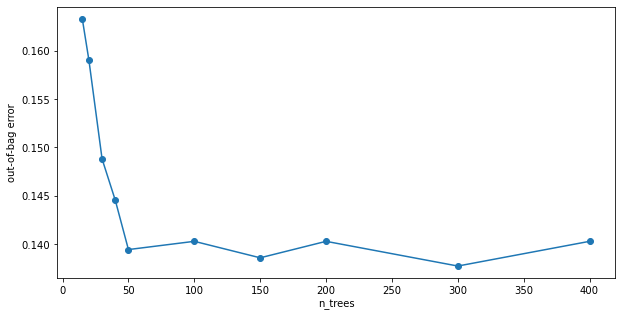

In [48]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### Step 11. Compare with decisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
DTC = DecisionTreeClassifier(max_depth=4, random_state=42)
DTC.fit(X_test,y_test)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [53]:
DTC_y_pred = DTC.predict(X_test)
DTC_y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("DTC2.dot", 'w') as f:
    f = tree.export_graphviz(DTC,out_file=f,max_depth = 4,impurity = False, feature_names = X.columns.values,
        class_names=['Yes', 'No'], filled=True)

In [55]:
print("Accuracy of test :",DTC.score(X_test,y_test))

Accuracy of test : 0.9183673469387755


In [56]:
print(classification_report(y_test,DTC_y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       255
           1       1.00      0.38      0.56        39

    accuracy                           0.92       294
   macro avg       0.96      0.69      0.76       294
weighted avg       0.93      0.92      0.90       294



In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [60]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy =", accuracy_score(y_test, RFC_y_pred),"\n")
print("Report:\n", classification_report(y_test, RFC_y_pred))

Accuracy = 0.8639455782312925 

Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [61]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy =", accuracy_score(y_test, DTC_y_pred),"\n")
print("Report:\n", classification_report(y_test, DTC_y_pred))

Accuracy = 0.9183673469387755 

Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       255
           1       1.00      0.38      0.56        39

    accuracy                           0.92       294
   macro avg       0.96      0.69      0.76       294
weighted avg       0.93      0.92      0.90       294

